In [29]:
import seaborn as sns 
import matplotlib.pyplot as plt
import librosa 
import librosa.display
from IPython.display import Audio
import warnings 
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd 
import os 


In [66]:
emotion_path = []
emotion_name = []
for dirname, _, filenames in os.walk('/kaggle/input/toronto-emotional-speech-set-tess'):
    for filename in filenames:
        emotion_path.append(os.path.join(dirname, filename))

        Emotions = filename.split('_')[-1]

        Emotions = Emotions.split('.')[0]
        emotion_name.append(Emotions.lower())
print("Uploaded")

Uploaded


In [3]:
emotion_path[:5]

['/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_home_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_youth_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_near_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_search_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_pick_fear.wav']

In [4]:
emotion_name[:6]

['fear', 'fear', 'fear', 'fear', 'fear', 'fear']

In [91]:
df = pd.DataFrame()
df['Speech'] = emotion_path
df['label'] = emotion_name
df.head()

,Speech,label
0,/kaggle/input/toronto-emotional-speech-set-tes...,fear
1,/kaggle/input/toronto-emotional-speech-set-tes...,fear
2,/kaggle/input/toronto-emotional-speech-set-tes...,fear
3,/kaggle/input/toronto-emotional-speech-set-tes...,fear
4,/kaggle/input/toronto-emotional-speech-set-tes...,fear


In [92]:
def wave(data, sr, emotion):
    plt.figure(figsize = (10,4))
    plt.title(emotion, size = 20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectra(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize = (12,4))
    plt.title(emotion, size = 20)
    librosa.display.specshow(xdb, sr = sr, x_axis = 'time', y_axis = 'hz')
    plt.colorbar()

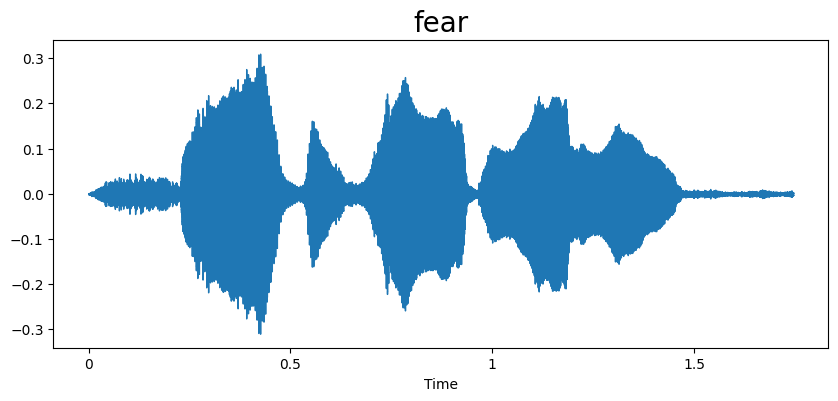

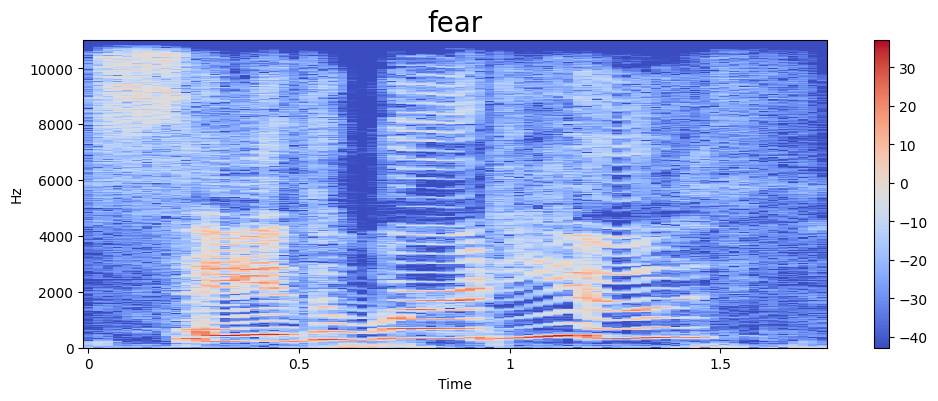

In [93]:
emotion = 'fear'
path = df['Speech'][df['label']==emotion].iloc[1]
data, sampling_rate = librosa.load(path)
wave(data, sampling_rate, emotion)
spectra(data,sampling_rate, emotion)

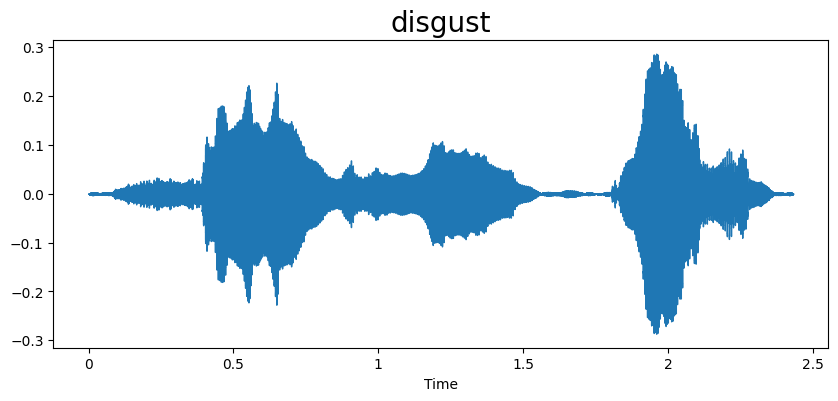

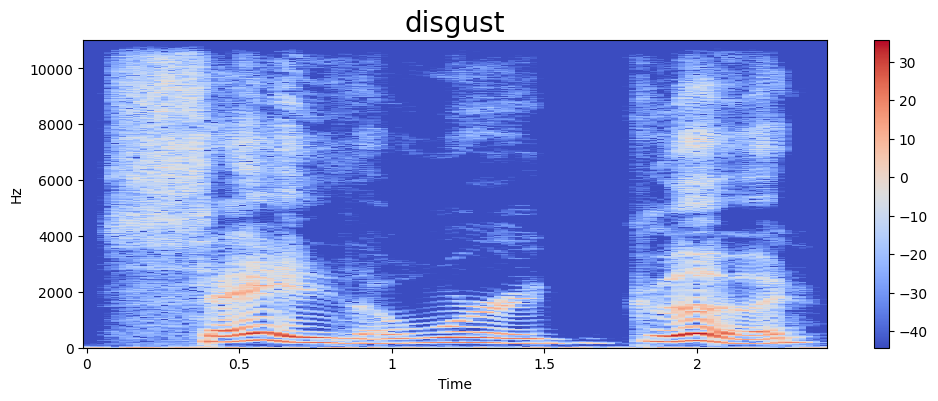

In [94]:
emotion = 'disgust'
path = df['Speech'][df['label']==emotion].iloc[0]
data, sampling_rate = librosa.load(path)
wave(data, sampling_rate, emotion)
spectra(data,sampling_rate, emotion)

In [95]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=4, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [96]:
extract_mfcc(df['Speech'][1])

array([-3.48343323e+02,  3.51932335e+01, -3.84132743e+00,  1.46588755e+01,
        6.42105436e+00, -7.73786604e-01, -4.09144354e+00, -7.51250267e+00,
       -2.01212730e+01,  1.18044913e+00, -1.38880415e+01,  1.45124805e+00,
       -2.75675035e+00,  2.42258763e+00,  4.35812235e-01,  2.73143792e+00,
       -1.60949039e+00,  2.09669933e+01,  6.82517910e+00,  2.08574429e+01,
        2.34099522e+01,  1.87370834e+01,  4.25021410e+00,  4.57039547e+00,
       -6.56271076e+00,  7.48917580e+00,  4.70022947e-01,  2.87454438e+00,
       -1.13248844e+01, -1.00278053e+01, -2.99417210e+00,  7.14576530e+00,
       -1.77482986e+00, -7.04389954e+00, -1.25711594e+01,  3.31683683e+00,
        1.70179522e+00, -6.45631790e-01,  3.35101277e-01,  9.38359833e+00],
      dtype=float32)

In [97]:
x_mfcc = df['Speech'].apply(lambda x: extract_mfcc(x))

In [98]:
X = [x for x in x_mfcc]
X = np.array(X)
X

array([[-2.8573730e+02,  8.5782951e+01, -2.1689105e+00, ...,
         2.5600505e+00,  1.1454375e+01,  1.1233450e+01],
       [-3.4834332e+02,  3.5193233e+01, -3.8413274e+00, ...,
        -6.4563179e-01,  3.3510128e-01,  9.3835983e+00],
       [-3.4011435e+02,  5.3796444e+01, -1.4267782e+01, ...,
         2.7556989e+00,  1.1734241e+01,  1.1355122e+01],
       ...,
       [-3.5754886e+02,  7.7886063e+01, -1.5224756e+01, ...,
         5.6639209e+00,  6.2842517e+00,  6.4624739e+00],
       [-3.5314743e+02,  1.0168391e+02, -1.4175895e+01, ...,
         5.1654329e+00,  4.3135686e+00,  9.3853295e-01],
       [-3.8945950e+02,  5.4042767e+01,  1.3469967e+00, ...,
         3.8039308e+00,  5.6496859e-01, -7.1746975e-01]], dtype=float32)

In [101]:
x = np.expand_dims(X, -1)
x.shape

(5600, 40, 1)

In [102]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [109]:
y=y.toarray()

In [110]:
y

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [111]:
y.shape

(5600, 7)

In [112]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [114]:
y

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [115]:
model = Sequential([
    LSTM(123, return_sequences=False, input_shape = (40, 1)),
    Dense(64, activation = 'relu'),
    Dropout(0.2),
    Dense(32, activation = 'relu'),
    Dropout(0.2),
    Dense(7, activation = 'softmax')
])

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_7 (LSTM)                   │ (None, 123)            │        61,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 64)             │         7,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 71,747 (280.26 KB)

 Trainable params: 71,747 (280.26 KB)

 Non-trainable params: 0 (0.00 B)

In [116]:
history = model.fit(X, y, validation_split = 0.2, epochs = 100, batch_size = 512, shuffle = True)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.2951 - loss: 1.8718 - val_accuracy: 0.0884 - val_loss: 2.1143
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5250 - loss: 1.5311 - val_accuracy: 0.1080 - val_loss: 2.0198
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6480 - loss: 1.1345 - val_accuracy: 0.1768 - val_loss: 1.7084
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7269 - loss: 0.8117 - val_accuracy: 0.4866 - val_loss: 1.1918
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8058 - loss: 0.5791 - val_accuracy: 0.7098 - val_loss: 0.8026
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8636 - loss: 0.4199 - val_accuracy: 0.7500 - val_loss: 0.6255
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8870 - loss: 0.3545 - val_accuracy: 0.8518 - val_loss: 0.5580
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9079 - loss: 0.2835 - val_accuracy: 0.9080 - val_loss:

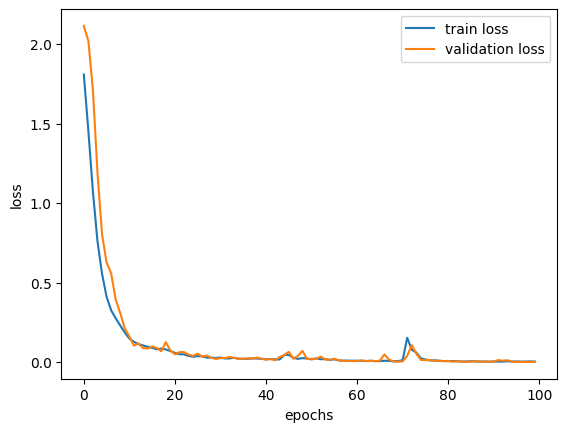

In [121]:
epochs = list(range(100))
loss = history.history['loss']
vali_loss = history.history['val_loss']

plt.plot(epochs, loss, label = 'train loss')
plt.plot(epochs, val_loss, label = 'validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

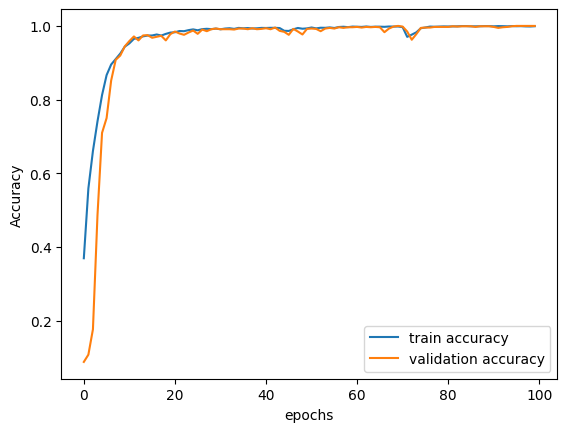

In [122]:
epochs = list(range(100))
acc = history.history['accuracy']
vali_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label = 'train accuracy')
plt.plot(epochs, val_acc, label = 'validation accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [123]:
model.save('/kaggle/working/emotion detection from voice.h5')

In [124]:
df.to_csv('/kaggle/working/speech.csv', index=False)


In [125]:
from keras.models import load_model

model_path = '/kaggle/working/emotion detection from voice.h5'
model = load_model(model_path)

In [134]:
df = pd.read_csv('/kaggle/working/speech.csv')
enc = OneHotEncoder()
enc.fit(df[['label']])

OneHotEncoder()

In [135]:
def extract_mfcc(filename, duration=3, offset=0.5):
    y, sr = librosa.load(filename, duration=duration, offset=offset)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [137]:
input = '/kaggle/input/voice-wav-file/about_time.wav'  # Replace with the path to your uploaded audio file

# Extract MFCC features from the new audio file
mfcc = extract_mfcc(input)
X_new = np.expand_dims(mfcc, axis=0)
X_new = np.expand_dims(X_new, axis=-1)

# Predict the emotion
predictions = model.predict(X_new)
predicted_label = np.argmax(predictions, axis=1)

# Get the label names
predicted_emotion = enc.inverse_transform(predictions)
print(f'The predicted emotion is: {predicted_emotion[0][0]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
The predicted emotion is: disgust
